# Linear Regression and Amazon Linear Learner Algorithm - Part 1

# Assumptions and Disclaimers
This blogpost assumes that you have already completed the following tutorials from Amazon SageMaker docuemntation:
- [Setting up](https://docs.aws.amazon.com/sagemaker/latest/dg/gs-set-up.html)
- [Create am Amazon SageMaker Notebook Instance](https://docs.aws.amazon.com/sagemaker/latest/dg/gs-setup-working-env.html)
- I have included 'sagemaker' in the name of my S3 bucket, "cyrusmv-sagemaker-demos' and have chosen to let any SageMaker notebook instance to access any S3 bucket with the term 'sagemaker' included in the name. This is however is not a recommended security option for production and is only useful for simplifying the flow of the blog.



# Introduction

Surprisingly many problems in the real-world can be approximated to a linear problem, meaning that a function of degree one over a vector of parameters is a representation of the data. Linear regression is perhaps the most applied and simplest of all machine learning models.

With this in mind, we have implemented a scalable linear regression model as a part of Amazon Algorithms that can be used in SageMaker.

In part 1 of this post I intend to provide an easy and intuitive introduction to linear regression as well as providing references to implement your own linear regression, both from scratch and using MXNet and Gluon.

In part 2 we use the Visa Credit Card Fraud dataset from Kaggle, pre-process the data, and use Amazon LinearLearner to predict fraudulant transactions.

In part3 we go through a complete process of pre-processing data and preparing it a dataset for Machine Learning algorithms.

## An Introduction to Linear Regression
### The Theory:
Let us you have a dataset composed of descrete values scattered around in a way that a straight line can pass through them, which most of the data are within a certain distance from the line.

Remembering from high-school math, we now that in a two-dimential space a straight line can ber represented a function, formalized as:
$$f:\mathcal{D} \rightarrow \mathcal{R}$$
$$y = f(x) = ax + b$$
Now if $\mathcal{D}=\left\{0, 2, 3, ..., 49\right\}$, then for $a=2$ and $b=1$, $\mathcal{R}$ is all positive odd numbers that are less than $100$
Below we create such data and plot the function.


In [19]:
import numpy as np #a library for array operations
import matplotlib.pyplot as plt #Python 2D plotting library
range_start = 0
range_end = 49

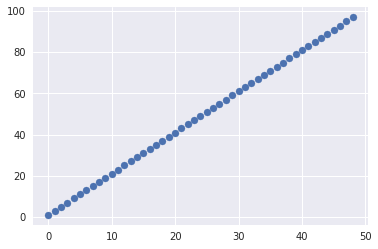

In [20]:
d = np.arange(range_start, range_end)
r = list(map(lambda x: 2 * x + 1, d)) #function y = 2x+1 for domain d, returning the range as a list
plt.scatter(d, r, )
plt.show()

**Adding Noide**
The problem is that the data in real life is noisy and almost never follows a perfect line. In many cases, however the distribution of data permits us to approximate the data to a line that represents the istribution with some error. Below we synthesize a dataset based on the same function, except that, the domain will be a random normal distribution with some random noise between 0 and 1.

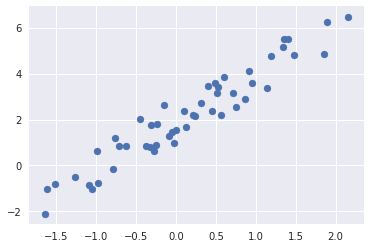

In [21]:
import random as rnd
noise_factor = 2
rnd.seed(42)
np.random.seed(13)
d = np.random.normal(loc=range_start, scale=1, size=range_end + 1)
r = list(map(lambda x: 2 * x + 1 + rnd.random()* noise_factor, d))
plt.scatter(d, r, )
plt.show()

We can still notive that we can use a stright line to which the data pattern can be approxmated. in a multi-dimentional world, where the function variable is a vector such as <age, income, postal district, ...>, our function would be:
$$f:{V} \subseteq \mathbb{R}^n  \rightarrow \mathcal{R} \subseteq \mathbb{R}
\\ 
y = f(V) = V.W + b
$$
in which V is the input feature vectord, w is a parameter or weight vector and b is bias. The task of linear regression is to find optimal w and b in order to approximate the data to a line.

In below plot we are using seaborn in order to find the appropriate line. The green line is in fact the optimal line.

Suppose we have a 4D input space $$V=\{inv_1=genter, v_2=age, v_3=education, v_4=postal_district\}$$ and would like to predect income. Since the range of the function is $\mathbb {R}$ and $V$ has a dimention of $1 \times 4$, we should find $W_{4 \times 1}$ and scalar $d$ to solve the linear regression problem.

$$
f: \mathbb{R^4} \rightarrow \mathbb{R} \\ 
f(V) = \left[\begin{array}{cc} v_1 & v_2 & v_3 & v_4 \end{array}\right]_{1 \times 4} \ 
\left[\begin{array}{cc} w_1\\ w_2\\ w_3\\ w_4 \end{array}\right]_{4 \times 1} \
+ d \ \epsilon \ \mathbb {R}  = y \ \epsilon \ \mathbb {R}
$$

In machine learning the input space is always multi-dimentional, but in our exaples and plots we have used 1D syntetic data in order to simplify the presentation.

*Challenge:* You can change shape and noise of the data and check the results.

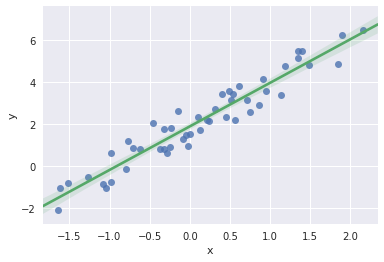

In [22]:
import seaborn as sns
import pandas as pd

noisy_data = pd.DataFrame(np.column_stack((d, r)), columns=['x', 'y'])
sns.set(color_codes=True)
sns.regplot('x', 'y', data=noisy_data, line_kws={'color': 'g'}, scatter_kws={'color':'b'})
plt.show()


In [23]:
print("in the perfect world f(d[5]) = f({}) = {}".format(d[5], 2*d[5]+1))
print("in the reality f(d[5]) = f({}) = {}".format(d[5], r[5]))


in the perfect world f(d[5]) = f(0.5323378882945463) = 2.064675776589093
in the reality f(d[5]) = f(0.5323378882945463) = 3.4180747514349155


## Model Error
in the perfect world f(d[5]) = f(0.5323378882945463) = __2.064675776589093__. 
in the reality f(d[5]) = f(0.5323378882945463) = **3.4180747514349155**.

The first number is passing a number to our linear function, calculating the results based on its formula and prnting the results. The delt between the two numbers is resulted from error in the model. As we approximated out datapoints to a line, we introduced a delta between actual position of a point and its projected position on the refression line.

This might look like loss of accuracy, but in fact this approximation is the sourced of generalization power of machine learning for as long as the error is within acceptable threshold.

There are many mehtods of calculting error. One of the most common for linear regression is MSE or Mean Squared Error.

![Model Error or Loss](https://github.com/zackchase/mxnet-the-straight-dope/raw/dc1822005027d63eb9a20cde1a6276c7714050f4/img/linear-regression.png)

*reference: https://github.com/zackchase/mxnet-the-straight-dope/blob/master/chapter02_supervised-learning/linear-regression-scratch.ipynb*

We can observe in thed below diagram that every point has a distance to the line. MSE is averaring distances of all the datapoint to our regression lin or formally:

Assume that $N$ is the number of data points and $d_i$ is the euclidean distance of data point $p_i$ to the regression line $l$, then: 
$$
MSE = \frac{1}{n}\sum_{i=1}^{N}d_i
$$
if $y_i$ is the the observed value for a particular input $x_i$ and $\hat{y_i}$ is the predicted value, then their euclidean distance is calculated as:

$$
d^2 = (y_i - \hat{y_i})^2 \\
\therefore \\
\mathcal{L} = MSE = \frac{1}{n}\sum_{i=1}^{N}{(y_i - \hat{y_i})^2}
$$

RMSE is a varint of MSE and is very popular for calculation of model error:
$$
\mathcal{L} = RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{N}{(y_i - \hat{y_i})^2}}
$$

## An Example
A classic example of linear regression is survival score for a pssenger in Titanic's infamous maiden vouyage. Let us start with a simple example. A classic example of linear regression is survival score for a passenger in Titanic's infamous maiden voyage.  Titanic dataset in Kaggle has captured this data. for more information on the dataset please chekout [!this link](https://www.kaggle.com/c/titanic). 

Note that I have already uploaded titaic train.csv from the kaggle website onto an S3 bucket called 


In [17]:
#Downloading data files from S3 to the notebook instance
import boto3

bucket = 'cyrusmv-sagemaker-demos' 
protocol = 's3://'

#titanic dataset
titanic_train_prefix = 'titanic-kaggle/train.csv'
titanic_train_datafile = 'data/titanic_train.csv'


#Downloading the file to a local folder
client = boto3.client('s3')
with open(titanic_train_datafile, 'wb') as f:
    client.download_fileobj(bucket, titanic_train_prefix, f)
    
    


In [18]:
#Inspecting Data
df = pd.read_csv(titanic_train_datafile)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


All columns, other than *surviced* are called *features*. The goal of regression task is to predict the *target* based on learning patterns from *features*. Column *surviced* is our target. 

The regression task predicts a probability of survival. In a binary predection, we use a threshold function to make a binary decision based on propability score. For example, using a step function to set the threshold.
$$ 
f(x) = \begin{cases} 
      1 & x\geqq 0.5, \\
      0 & x< 0.5 
   \end{cases}
$$
We can indeed change the threshold in order to tune the model.

__***Note:***__ for logistic regression or Binary Classification Binary Cross Entropy Loss is being used, which is outside of the scope of this blog. for more information plase refer to: [logistic regression using gluon](https://github.com/zackchase/mxnet-the-straight-dope/blob/master/chapter02_supervised-learning/logistic-regression-gluon.ipynb)

We shall now depart from the Titanic example, because the data requires pre-processing. Pre-processing of data is a crucial task in developing machine learning models and requires a separate post. We now use the credit card data set from Kaggle, where data is pre-processed, meaning:
- All data is numeric
- All data is factorized, meaning that ranges are transformed to *"one-of-N* form.
- All data is normalized, meaning that the ranges have become comparable.

More details on data pre-processing in part 3 of the blog.

For more information and learning how to write your own linear regression model please refer to:
- [linear regression from scratch](https://github.com/zackchase/mxnet-the-straight-dope/blob/master/chapter02_supervised-learning/linear-regression-scratch.ipynb)
- [linear regression using gluon](https://github.com/zackchase/mxnet-the-straight-dope/blob/master/chapter02_supervised-learning/linear-regression-gluon.ipynb)

for the binary variant or logistic regression please refer to:
- [logistic regression using gluon](https://github.com/zackchase/mxnet-the-straight-dope/blob/master/chapter02_supervised-learning/logistic-regression-gluon.ipynb)


# End of Part 1.
for learning about linear learner pleased read part 2 of this blog